In [1]:
%matplotlib inline

import numpy as np
from skimage import data
from IPython.display import Image, display

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

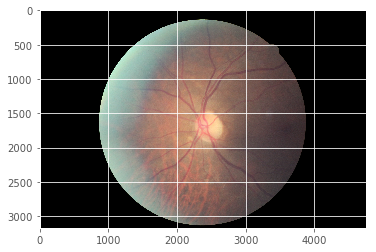

In [2]:
im = data.imread('sample/10_left.jpeg')
plt.imshow(im)

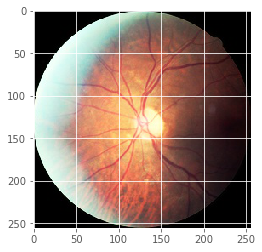

In [5]:
im1 = data.imread('sample/10_left_conv.jpeg')
plt.imshow(im1)

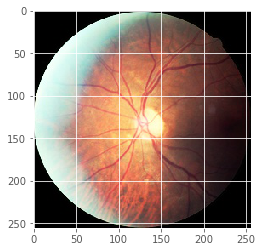

In [6]:
im2 = data.imread('sample/10_left_conv_2.jpeg')
plt.imshow(im2)

In [9]:
im_l = data.imread('sample/10_left.jpeg')
im_r = data.imread('sample/10_right.jpeg')

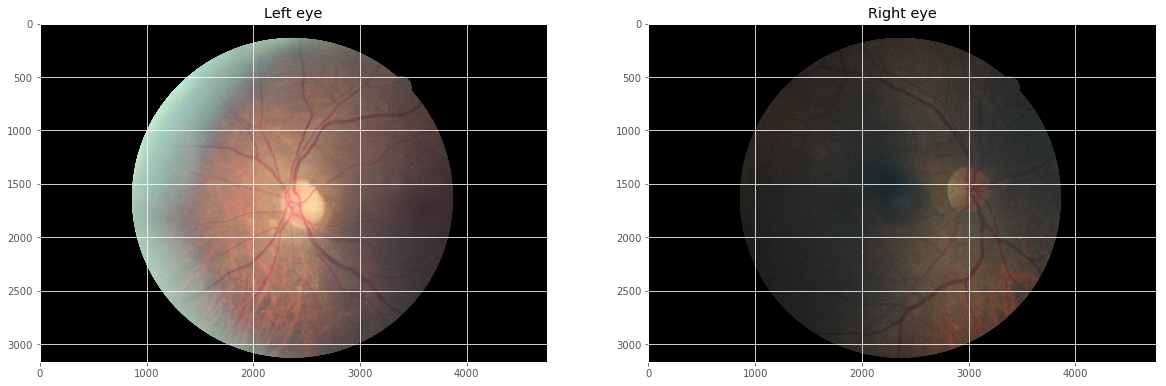

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
ax[0].imshow(im_l)
ax[0].set_title('Left eye')
ax[1].imshow(im_r)
ax[1].set_title('Right eye')

(256, 256, 3)